In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

DATA_DIR = Path("../data")
EEG_FILE = DATA_DIR / "clean_eeg.csv"
SUMMARY_FILE = DATA_DIR / "challenger_insight_session_summary.csv"

In [2]:
# Load session summary data
summary = pd.read_csv(SUMMARY_FILE)

print("Dataset shape:", summary.shape)
print("\nColumns:", summary.columns.tolist())
print("\nFirst few rows:")
display(summary.head())

Dataset shape: (76, 11)

Columns: ['subject_id', 'session_id', 'stimulus_type', 'task_difficulty', 'modality', 'start_time', 'end_time', 'n_segments', 'mean_cog_load', 'pct_engaged', 'mean_disengage_risk']

First few rows:


,subject_id,session_id,stimulus_type,task_difficulty,modality,start_time,end_time,n_segments,mean_cog_load,pct_engaged,mean_disengage_risk
0,S001,U8KXB4N9,Discussion,Easy,Live Workshop,2025-04-01 14:00:00,2025-04-01 14:10:10,62,0.290,46.8,0.466
1,S002,U5HKN6BB,Hands-on Lab,Moderate,Async Video,2025-02-10 14:00:00,2025-02-10 14:05:50,36,0.269,66.7,0.347
2,S005,UOWZ6RUE,Lecture,Moderate,Async Video,2025-01-16 14:00:00,2025-01-16 14:06:00,37,0.284,62.2,0.410
3,S006,U56BXK8B,Discussion,Moderate,Self-Paced,2025-02-18 13:00:00,2025-02-18 13:05:10,32,0.270,59.4,0.422
4,S007,U0L23F7L,Code-Along,Moderate,Async Video,2025-03-21 15:00:00,2025-03-21 15:19:00,115,0.280,66.1,0.373


In [3]:
# ========================================
# STEP 1: BASIC STATISTICS
# ========================================

print("="*60)
print("PCT_ENGAGED DISTRIBUTION STATISTICS")
print("="*60)

print("\nDescriptive Statistics:")
print(summary["pct_engaged"].describe())

print("\nKey Percentiles:")
percentiles = [0.10, 0.25, 0.50, 0.75, 0.90]
for p in percentiles:
    val = summary["pct_engaged"].quantile(p)
    print(f"  {int(p*100)}th percentile: {val:.1f}%")

print("\nRange:")
print(f"  Minimum: {summary['pct_engaged'].min():.1f}%")
print(f"  Maximum: {summary['pct_engaged'].max():.1f}%")
print(f"  Mean: {summary['pct_engaged'].mean():.1f}%")
print(f"  Median: {summary['pct_engaged'].median():.1f}%")

PCT_ENGAGED DISTRIBUTION STATISTICS

Descriptive Statistics:
count    76.000000
mean     61.528947
std       8.555494
min      40.000000
25%      55.675000
50%      61.200000
75%      67.400000
max      79.400000
Name: pct_engaged, dtype: float64

Key Percentiles:
  10th percentile: 50.0%
  25th percentile: 55.7%
  50th percentile: 61.2%
  75th percentile: 67.4%
  90th percentile: 72.1%

Range:
  Minimum: 40.0%
  Maximum: 79.4%
  Mean: 61.5%
  Median: 61.2%


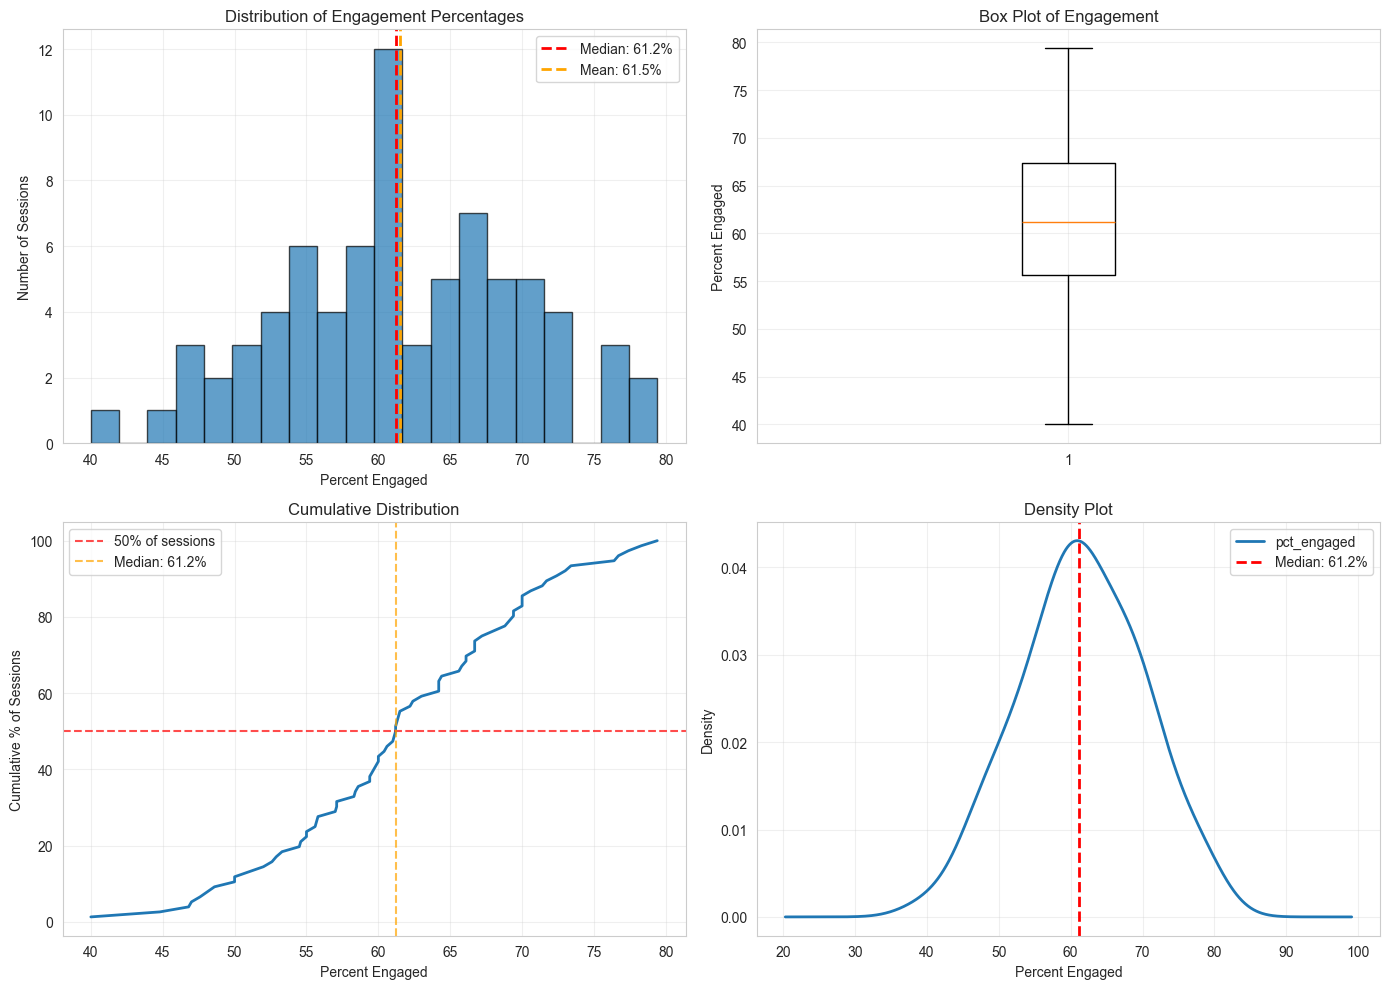


📊 Interpretation:
- Histogram: Shows how sessions are distributed across engagement levels
- Box Plot: Shows median, quartiles, and outliers
- Cumulative: Shows what % of sessions fall below each engagement level
- Density: Smoothed version of histogram showing concentration of data


In [4]:
# ========================================
# STEP 2: VISUALIZE DISTRIBUTION
# ========================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histogram
axes[0, 0].hist(summary["pct_engaged"], bins=20, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(summary["pct_engaged"].median(), color='red', linestyle='--', 
                   linewidth=2, label=f'Median: {summary["pct_engaged"].median():.1f}%')
axes[0, 0].axvline(summary["pct_engaged"].mean(), color='orange', linestyle='--', 
                   linewidth=2, label=f'Mean: {summary["pct_engaged"].mean():.1f}%')
axes[0, 0].set_xlabel("Percent Engaged")
axes[0, 0].set_ylabel("Number of Sessions")
axes[0, 0].set_title("Distribution of Engagement Percentages")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Box plot
axes[0, 1].boxplot(summary["pct_engaged"], vert=True)
axes[0, 1].set_ylabel("Percent Engaged")
axes[0, 1].set_title("Box Plot of Engagement")
axes[0, 1].grid(True, alpha=0.3)

# 3. Cumulative distribution
sorted_pct = np.sort(summary["pct_engaged"])
cumulative = np.arange(1, len(sorted_pct) + 1) / len(sorted_pct) * 100
axes[1, 0].plot(sorted_pct, cumulative, linewidth=2)
axes[1, 0].axhline(50, color='red', linestyle='--', alpha=0.7, label='50% of sessions')
axes[1, 0].axvline(summary["pct_engaged"].median(), color='orange', linestyle='--', 
                   alpha=0.7, label=f'Median: {summary["pct_engaged"].median():.1f}%')
axes[1, 0].set_xlabel("Percent Engaged")
axes[1, 0].set_ylabel("Cumulative % of Sessions")
axes[1, 0].set_title("Cumulative Distribution")
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. KDE (density plot)
summary["pct_engaged"].plot(kind='kde', ax=axes[1, 1], linewidth=2)
axes[1, 1].axvline(summary["pct_engaged"].median(), color='red', linestyle='--', 
                   linewidth=2, label=f'Median: {summary["pct_engaged"].median():.1f}%')
axes[1, 1].set_xlabel("Percent Engaged")
axes[1, 1].set_ylabel("Density")
axes[1, 1].set_title("Density Plot")
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print("- Histogram: Shows how sessions are distributed across engagement levels")
print("- Box Plot: Shows median, quartiles, and outliers")
print("- Cumulative: Shows what % of sessions fall below each engagement level")
print("- Density: Smoothed version of histogram showing concentration of data")

In [5]:
# ========================================
# STEP 3: ANALYZE DIFFERENT THRESHOLDS
# ========================================

print("\n" + "="*60)
print("CLASS BALANCE AT DIFFERENT THRESHOLDS")
print("="*60)

thresholds_to_test = [30, 40, 50, 60, 70]
threshold_results = []

for threshold in thresholds_to_test:
    n_disengaged = (summary["pct_engaged"] < threshold).sum()
    n_engaged = (summary["pct_engaged"] >= threshold).sum()
    pct_disengaged = n_disengaged / len(summary) * 100
    pct_engaged = n_engaged / len(summary) * 100
    
    threshold_results.append({
        "Threshold": f"< {threshold}%",
        "Disengaged (1)": n_disengaged,
        "Engaged (0)": n_engaged,
        "% Disengaged": f"{pct_disengaged:.1f}%",
        "% Engaged": f"{pct_engaged:.1f}%"
    })

df_thresholds = pd.DataFrame(threshold_results)
display(df_thresholds)

print("\n💡 Interpretation:")
print("- Look for a threshold that gives 20-40% in the minority class")
print("- Too imbalanced (90/10) makes learning difficult")
print("- Too balanced might not reflect reality")


CLASS BALANCE AT DIFFERENT THRESHOLDS


,Threshold,Disengaged (1),Engaged (0),% Disengaged,% Engaged
0,< 30%,0,76,0.0%,100.0%
1,< 40%,0,76,0.0%,100.0%
2,< 50%,7,69,9.2%,90.8%
3,< 60%,31,45,40.8%,59.2%
4,< 70%,62,14,81.6%,18.4%



💡 Interpretation:
- Look for a threshold that gives 20-40% in the minority class
- Too imbalanced (90/10) makes learning difficult
- Too balanced might not reflect reality


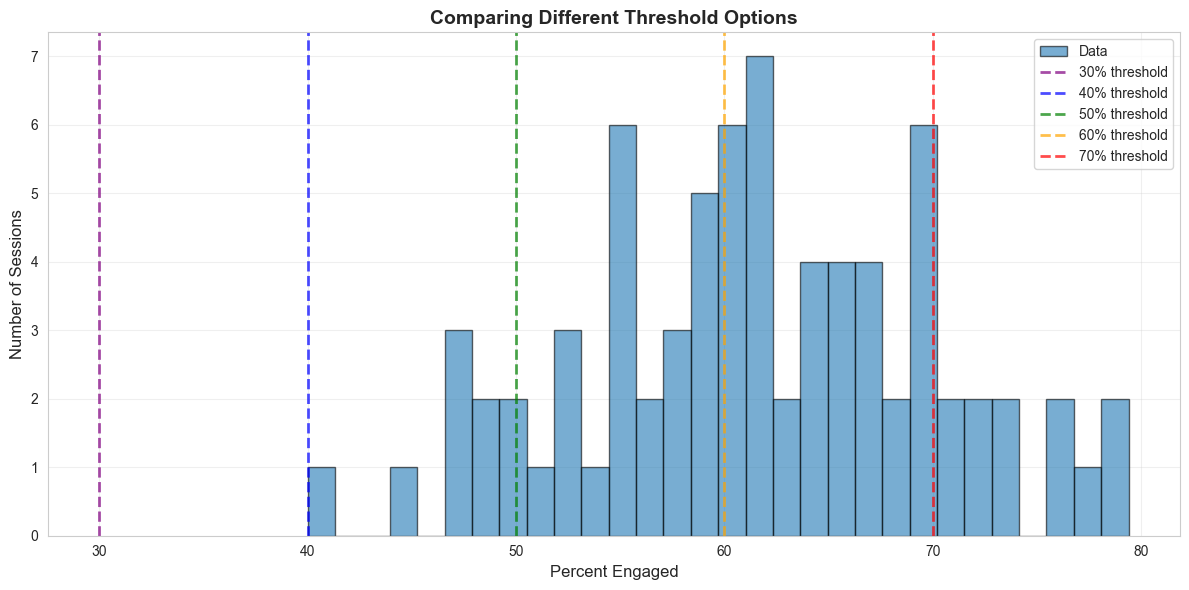


📍 Visual Guide:
- Everything LEFT of a threshold line = labeled 'disengaged'
- Everything RIGHT of a threshold line = labeled 'engaged'


In [6]:
# ========================================
# STEP 4: VISUALIZE THRESHOLD IMPACT
# ========================================

fig, ax = plt.subplots(figsize=(12, 6))

# Plot histogram
ax.hist(summary["pct_engaged"], bins=30, edgecolor='black', alpha=0.6, label='Data')

# Add threshold lines
colors = ['purple', 'blue', 'green', 'orange', 'red']
for threshold, color in zip(thresholds_to_test, colors):
    ax.axvline(threshold, color=color, linestyle='--', linewidth=2, 
               label=f'{threshold}% threshold', alpha=0.7)

ax.set_xlabel("Percent Engaged", fontsize=12)
ax.set_ylabel("Number of Sessions", fontsize=12)
ax.set_title("Comparing Different Threshold Options", fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📍 Visual Guide:")
print("- Everything LEFT of a threshold line = labeled 'disengaged'")
print("- Everything RIGHT of a threshold line = labeled 'engaged'")

In [7]:
# STEP 5: RECOMMENDATIONS
# ========================================

print("\n" + "="*60)
print("THRESHOLD RECOMMENDATIONS")
print("="*60)

median_val = summary["pct_engaged"].median()
q25 = summary["pct_engaged"].quantile(0.25)
q75 = summary["pct_engaged"].quantile(0.75)

print("\n📊 Based on your data:")
print(f"   25th percentile: {q25:.1f}%")
print(f"   Median (50th):   {median_val:.1f}%")
print(f"   75th percentile: {q75:.1f}%")

print("\n🎯 Suggested Thresholds:")
print(f"\n1. CONSERVATIVE (catch severe cases only):")
print(f"   Use threshold: {q25:.1f}% (25th percentile)")
print(f"   → Identifies bottom 25% of sessions as disengaged")

print(f"\n2. BALANCED (natural split):")
print(f"   Use threshold: {median_val:.1f}% (median)")
print(f"   → Splits data evenly: bottom 50% vs top 50%")

print(f"\n3. AGGRESSIVE (early warning):")
print(f"   Use threshold: {q75:.1f}% (75th percentile)")
print(f"   → Catches anyone below top 25% as 'at risk'")

print("\n💡 My Recommendation:")
print(f"   → Start with MEDIAN ({median_val:.1f}%) as it provides a natural 50/50 split")
print("   → This is data-driven rather than arbitrary")
print("   → You can adjust later based on model performance")

print("\n" + "="*60)


THRESHOLD RECOMMENDATIONS

📊 Based on your data:
   25th percentile: 55.7%
   Median (50th):   61.2%
   75th percentile: 67.4%

🎯 Suggested Thresholds:

1. CONSERVATIVE (catch severe cases only):
   Use threshold: 55.7% (25th percentile)
   → Identifies bottom 25% of sessions as disengaged

2. BALANCED (natural split):
   Use threshold: 61.2% (median)
   → Splits data evenly: bottom 50% vs top 50%

3. AGGRESSIVE (early warning):
   Use threshold: 67.4% (75th percentile)
   → Catches anyone below top 25% as 'at risk'

💡 My Recommendation:
   → Start with MEDIAN (61.2%) as it provides a natural 50/50 split
   → This is data-driven rather than arbitrary
   → You can adjust later based on model performance




COMPARISON: pct_engaged vs mean_disengage_risk

Agreement between methods: 69.7%

Cross-tabulation:


engagement_based,0,1
risk_based,,
0,27,11
1,12,26


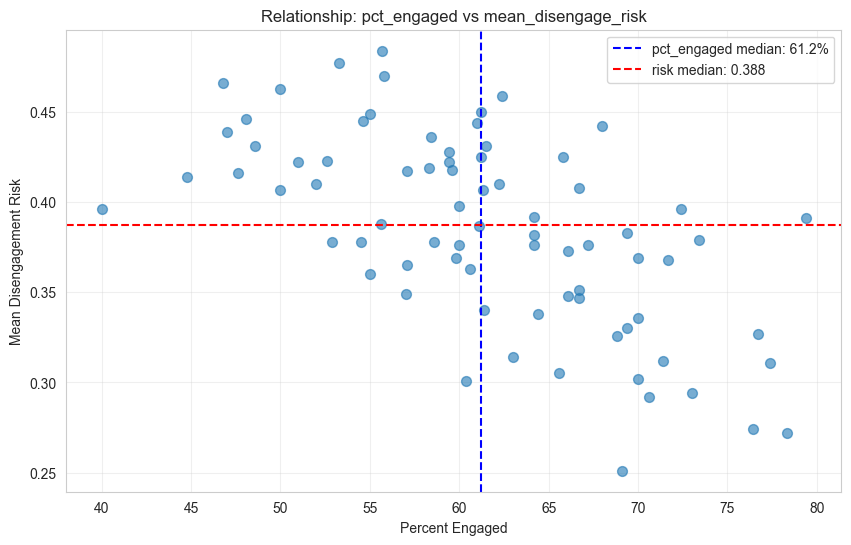


💡 Interpretation:
   → Moderate agreement. Some differences in classification.


In [ ]:
# ========================================
# BONUS: Compare with mean_disengage_risk approach
# ========================================

print("\n" + "="*60)
print("COMPARISON: pct_engaged vs mean_disengage_risk")
print("="*60)

# Method 1: Using median of mean_disengage_risk (old way)
risk_threshold = summary["mean_disengage_risk"].median()
labels_risk = (summary["mean_disengage_risk"] > risk_threshold).astype(int)

# Method 2: Using median of pct_engaged (new way)
eng_threshold = summary["pct_engaged"].median()
labels_engaged = (summary["pct_engaged"] < eng_threshold).astype(int)

# Compare agreement
agreement = (labels_risk == labels_engaged).mean() * 100
print(f"\nAgreement between methods: {agreement:.1f}%")

# Cross-tabulation
print("\nCross-tabulation:")
comparison_df = pd.DataFrame({
    'risk_based': labels_risk,
    'engagement_based': labels_engaged
})
crosstab = pd.crosstab(
    comparison_df['risk_based'], 
    comparison_df['engagement_based'],
    rownames=['risk_based'],
    colnames=['engagement_based']
)
display(crosstab)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(summary["pct_engaged"], summary["mean_disengage_risk"], 
            alpha=0.6, s=50)
plt.axvline(eng_threshold, color='blue', linestyle='--', 
            label=f'pct_engaged median: {eng_threshold:.1f}%')
plt.axhline(risk_threshold, color='red', linestyle='--', 
            label=f'risk median: {risk_threshold:.3f}')
plt.xlabel("Percent Engaged")
plt.ylabel("Mean Disengagement Risk")
plt.title("Relationship: pct_engaged vs mean_disengage_risk")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nInterpretation:")
if agreement > 80:
    print("   → High agreement! Both methods identify similar sessions.")
elif agreement > 60:
    print("   → Moderate agreement. Some differences in classification.")
else:
    print("   → Low agreement. Methods identify different sessions as disengaged.")
    print("   → This suggests they capture different aspects of disengagement.")